In [2]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [19]:
adult = pd.read_csv("adult.csv", index_col=[0])
adult = adult.replace("?", np.nan)

adult = adult[adult["salary"].isin(["<=50K", ">50K"])]
adult["salary K$"] = adult["salary K$"].astype(str)
adult = adult[adult["salary K$"].str.isnumeric()]

adult

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38



# Task 1
Print the count of men and women in the dataset.

In [20]:
sex_counts = adult["sex"].value_counts()
sex_counts

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [23]:
male = adult[adult["sex"] == "Male"]

average_age_of_men = male["age"].mean()
average_age_of_men

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [27]:
poland_count = (adult["native-country"] == "Poland").sum()

percentage_from_poland = (poland_count / len(adult)) * 100
percentage_from_poland

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [28]:
smaller_salary = adult[adult["salary"] == ">50K"]
mean_age_smaller_salary = smaller_salary["age"].mean()
std_age_smaller_salary = smaller_salary["age"].std()

bigger_salary = adult[adult["salary"] == "<=50K"]
mean_age_bigger_salary = bigger_salary["age"].mean()
std_age_bigger_salary = bigger_salary["age"].std()

mean_age_smaller_salary, std_age_smaller_salary, mean_age_bigger_salary, std_age_bigger_salary

(44.24984058155847, 10.519027719851826, 36.78373786407767, 14.02008849082488)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [32]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
high_income = adult[adult["salary"] == ">50K"]
people = high_income[~high_income["education"].isin(higher_education)]
people

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,60,South,>50K,275
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,NaN,>50K,166
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
...,...,...,...,...,...,...,...,...,...,...,...,...
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,NaN,>50K,212
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [33]:
education_statistics = adult.groupby("education")["age"].describe()
education_statistics

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [36]:
married_men = adult[(adult["marital-status"].str.startswith("Married")) & (adult["sex"] == "Male")]
married_men_high_income = (married_men["salary"] == ">50K").sum()
married_men_low_income = (married_men["salary"] == "<=50K").sum()

non_married_men = adult[(~adult["marital-status"].str.startswith("Married")) & (adult["sex"] == "Male")]
non_married_men_high_income = (non_married_men["salary"] == ">50K").sum()
non_married_men_low_income = (non_married_men["salary"] == "<=50K").sum()

if married_men_high_income > non_married_men_high_income:
    print("Married men earn more than non-married men in the >50K category.")
elif married_men_high_income < non_married_men_high_income:
    print("Non-married men earn more than married men in the >50K category.")
else:
    print("Married and non-married men earn the same in the >50K category.")

if married_men_low_income > non_married_men_low_income:
    print("Married men earn more than non-married men in the <=50K category.")
elif married_men_low_income < non_married_men_low_income:
    print("Non-married men earn more")

Married men earn more than non-married men in the >50K category.
Married men earn more than non-married men in the <=50K category.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [37]:
max_hours_per_week = adult["hours-per-week"].max()
people_with_max_hours = (adult["hours-per-week"] == max_hours_per_week).sum()
max_hours_per_week, people_with_max_hours

(99, 85)

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

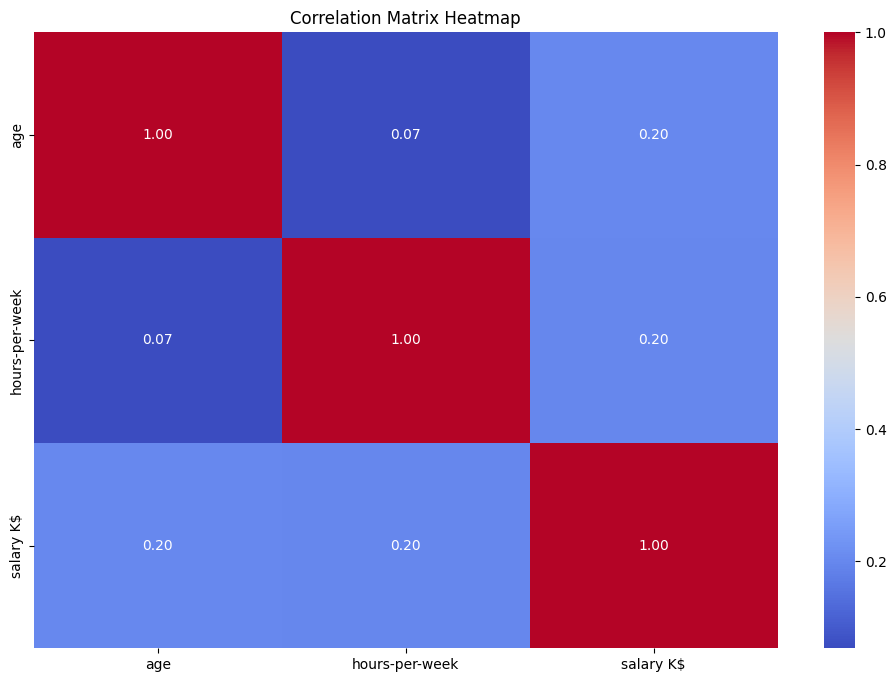

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(adult, columns=["age", "hours-per-week", "salary K$"])
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()